#Question 1

##Initials

In [414]:
import pandas as pd
import numpy as np
import os

if os.path.exists('data.csv'):
    print("Already Present")
else:
    os.system("wget https://www.dropbox.com/s/asxbmdmj7l5tc9j/glass.data")

import warnings
warnings.filterwarnings('ignore')


In [415]:
df=pd.read_csv("glass.data",names=["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"])

In [416]:
df.drop('Id',axis=1,inplace=True)

In [417]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type of glass
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0              1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0              1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0              1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0              1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0              1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...            ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0              7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0              7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0              7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0              7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0              7

[214 rows x 10 columns]

In [418]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [419]:
#scaling
y=df['Type of glass']
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
for col in df.columns:
    df[col]=scale.fit_transform(df[[col]])

In [420]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     0.316744    0.402684    0.597891    0.359784    0.507310    0.080041   
std      0.133313    0.122798    0.321249    0.155536    0.138312    0.105023   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.235843    0.327444    0.471047    0.280374    0.441071    0.019726   
50%      0.286655    0.386466    0.775056    0.333333    0.532143    0.089372   
75%      0.351514    0.465414    0.801782    0.417445    0.585268    0.098229   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               Ca          Ba          Fe  Type of glass  
count  214.000000  214.000000  214.000000     214.000000  
mean     0.327785    0.055570    0.111783       0.296729  
std      0.132263    0.157847    0.191056       0.350623  
min      0.000000    0.000000    0.000000       0.000000  
25%      0.261152    0.000000    0.000000       0.000000  
50%      0.294610    0.000000    0.000000       0.166667  
75%      0.347816    0.000000    0.196078       0.333333  
max      1.000000    1.000000    1.000000       1.000000

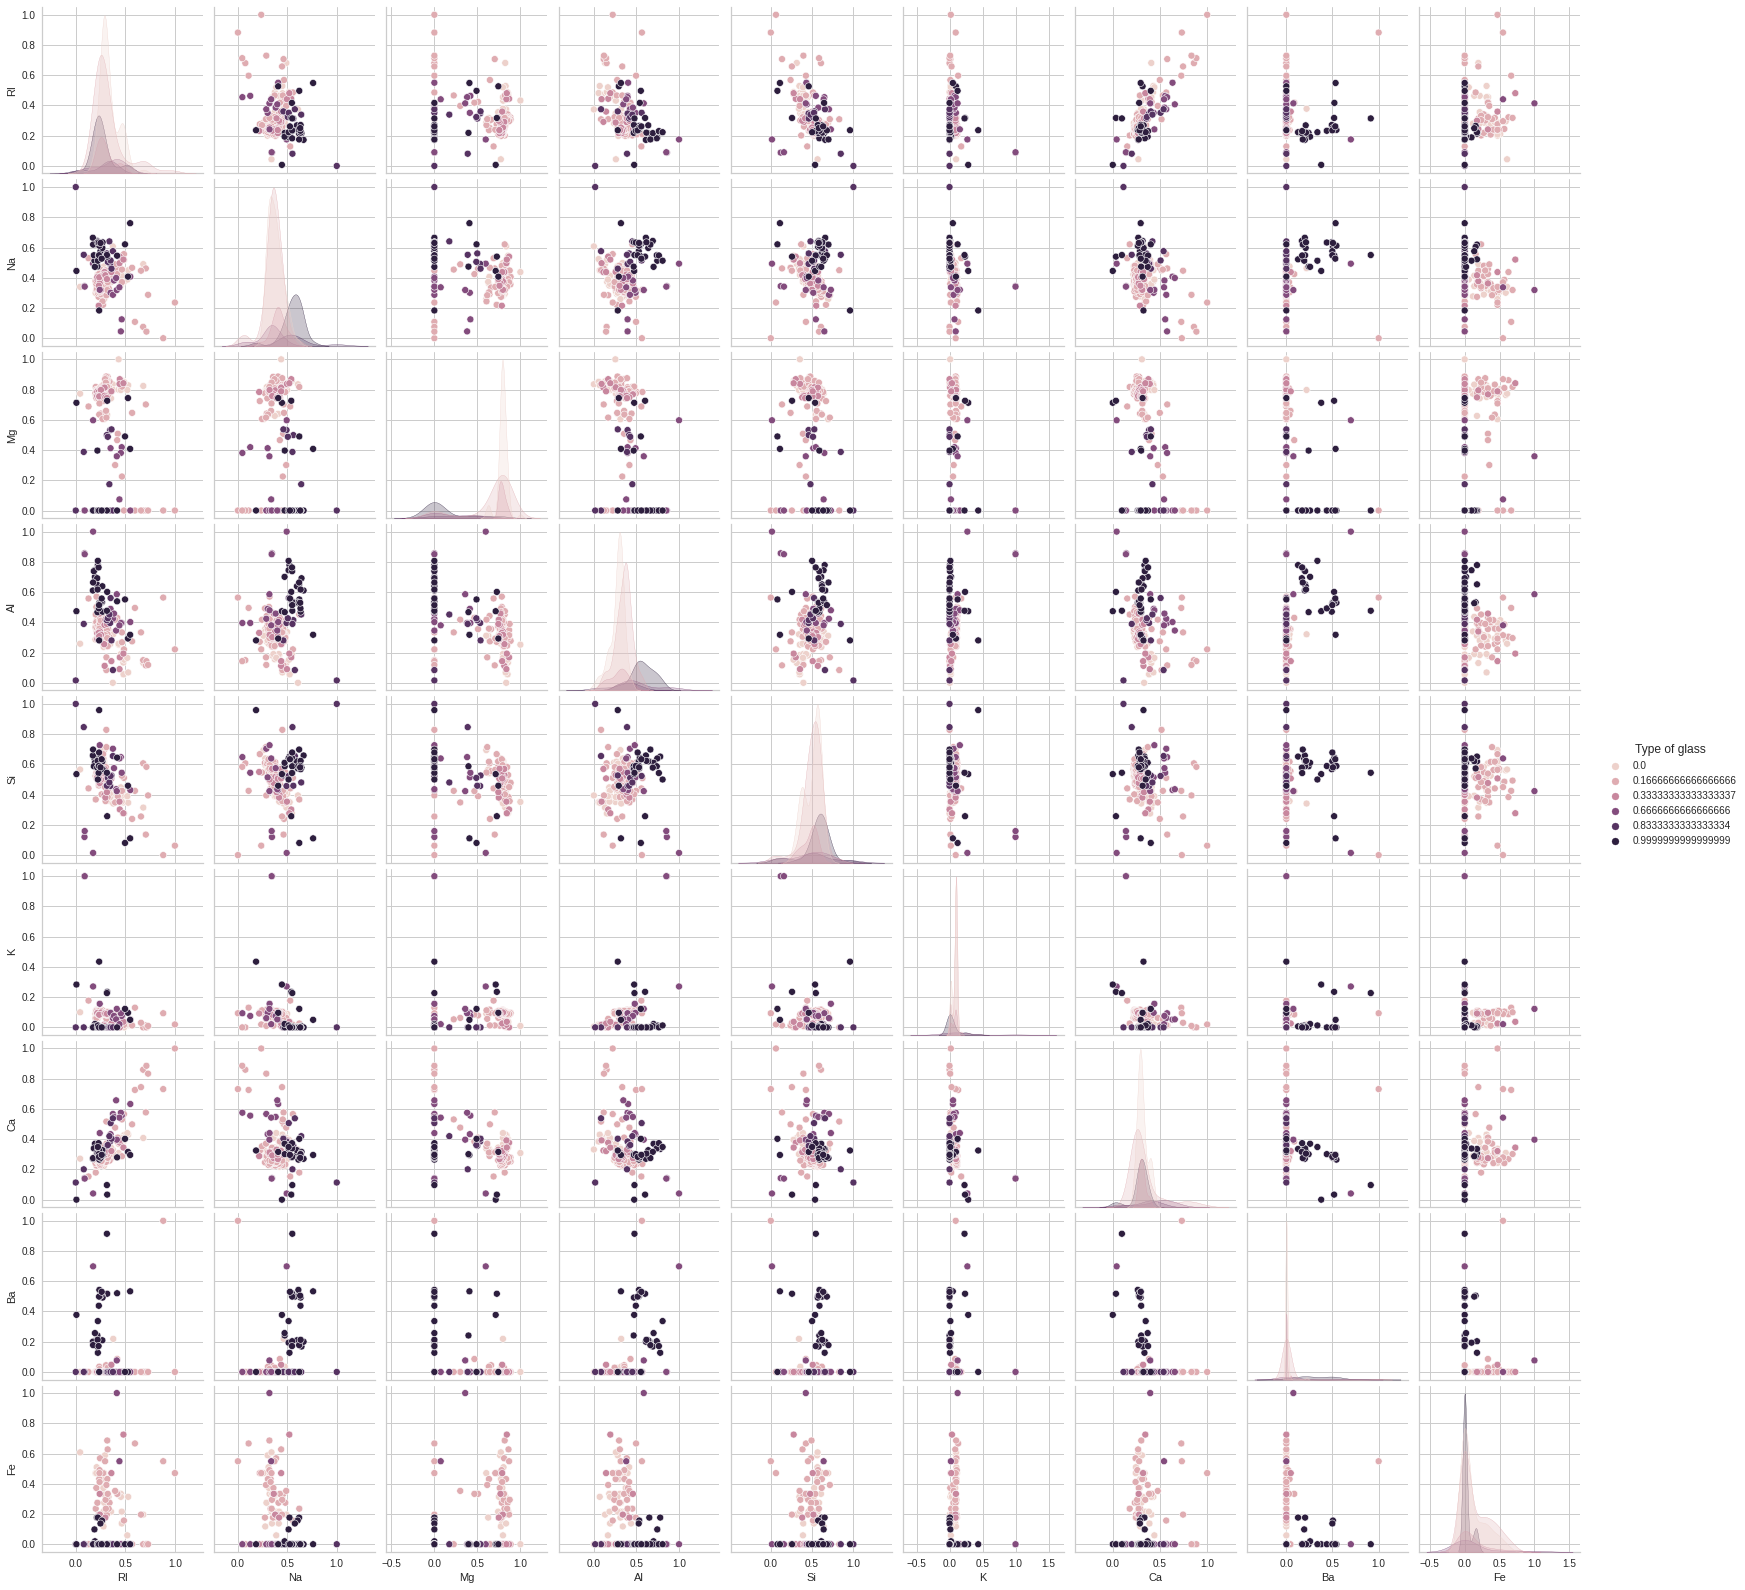

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df,hue='Type of glass')

In [422]:
#df to X,y
X=df.drop('Type of glass',axis=1)

##Part A

In [423]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [424]:
data = df.copy()

# Applying k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data.iloc[:, 1:10])

#Addon for Visualisation
data['cluster'] = kmeans.labels_

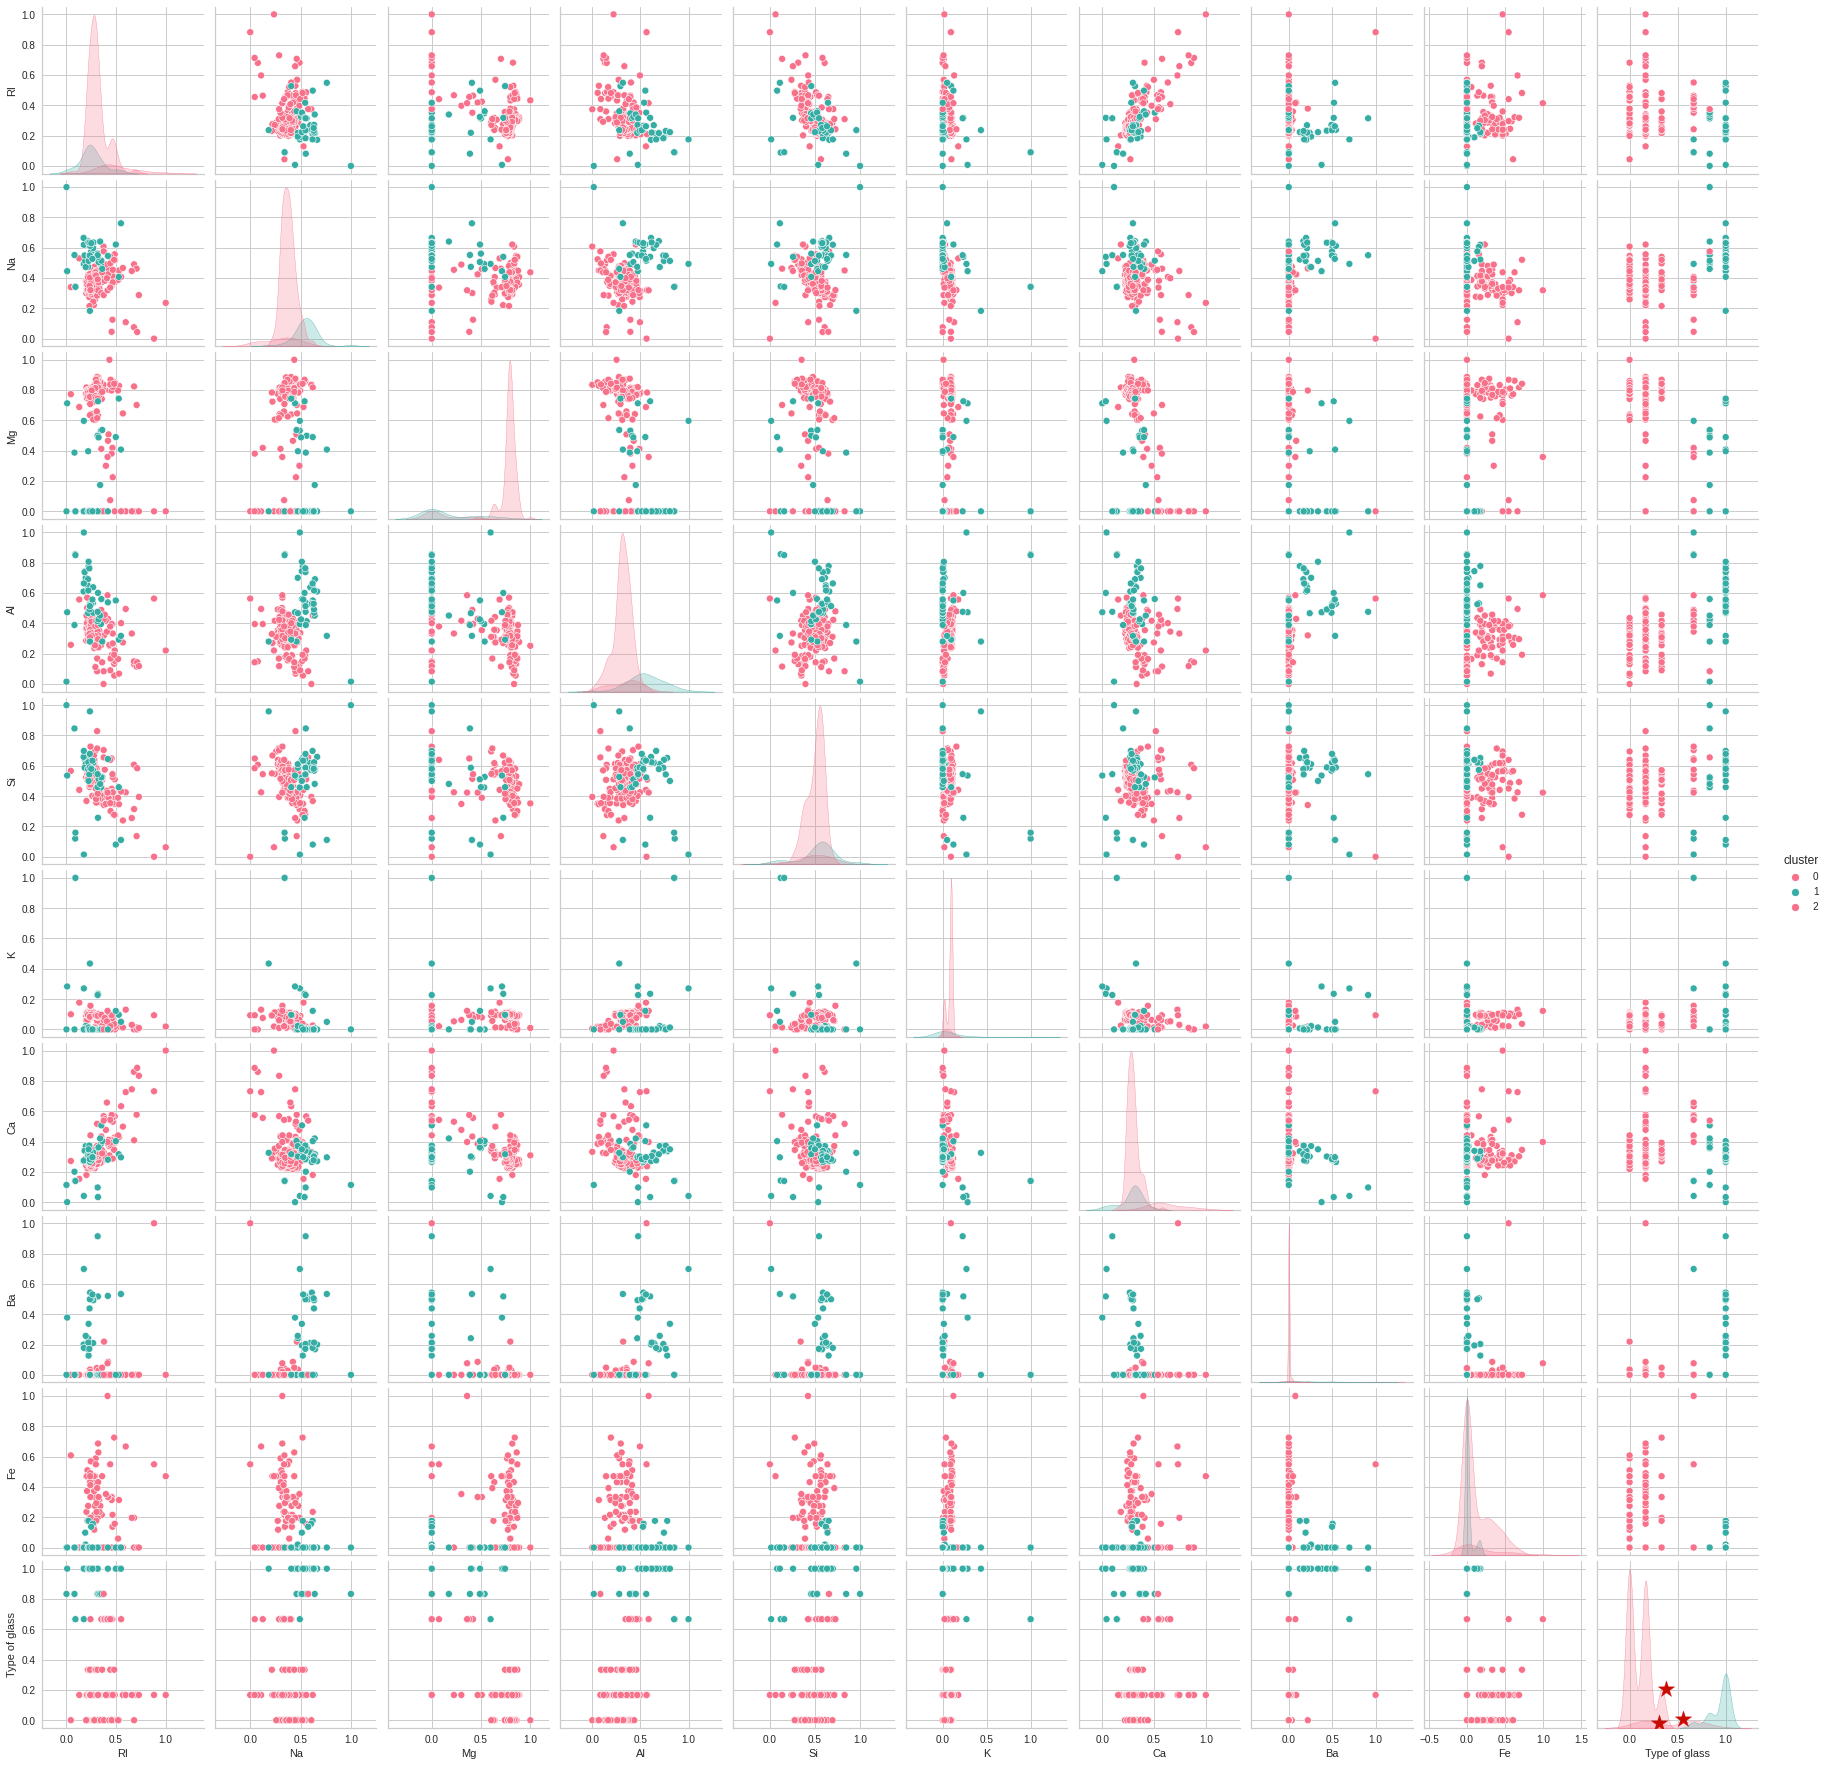

In [425]:
sns.pairplot(data, hue='cluster',palette="husl")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='r')
plt.show()

##Part B


In [426]:
from sklearn.metrics import silhouette_score

k=2, silhouette score=0.520130532687963
k=3, silhouette score=0.5252437159134774
k=4, silhouette score=0.3601632286268608
k=5, silhouette score=0.36821175803211376
k=6, silhouette score=0.379665414156591
k=7, silhouette score=0.3769890196579606
k=8, silhouette score=0.3852782215184577
k=9, silhouette score=0.3875450475803838
k=10, silhouette score=0.33284989265974935
k=11, silhouette score=0.39468168690055105


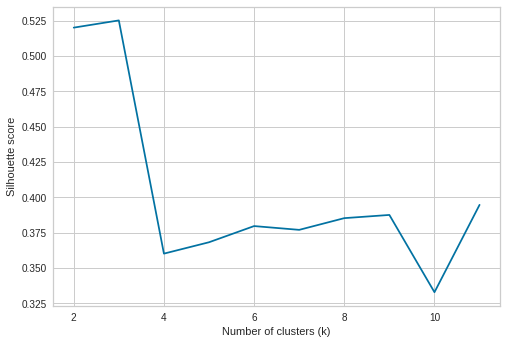

In [427]:
k_values = []
silhouette_scores = []

max_sil=0
optimalk=0
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sil = silhouette_score(X, kmeans.labels_)
    if(sil>max_sil):
        max_sil=sil
        optimalk=k
    k_values.append(k)
    silhouette_scores.append(sil)
    print(f"k={k}, silhouette score={sil}")

# Plot
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

In [428]:
print(f"Optimalk is {optimalk} ,with silhouette score as {max_sil}")

Optimalk is 3 ,with silhouette score as 0.5252437159134774


This is because silhouette score is close to 1 when k=3, so 3 is the optimal value of k using silhouette score

##Part C

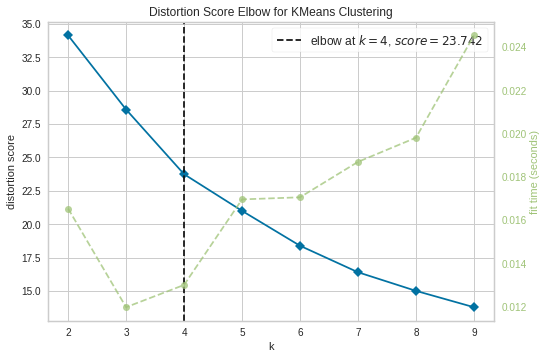

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [429]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
kelbV = KElbowVisualizer(model, k=(2,10))

kelbV.fit(X)        
kelbV.show() 

We got the elbow at k=4

##Part D

In [430]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for k in range(1,4):
    knn = KNeighborsClassifier(n_neighbors=k)
    bagging = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)

    bagging.fit(X_train, y_train)
    bag_y_pred_train = bagging.predict(X_train)
    bag_y_pred_test = bagging.predict(X_test)

    knn.fit(X_train, y_train)
    knn_y_pred_train=knn.predict(X_train)
    knn_y_pred_test=knn.predict(X_test)

    accuracy_bag_train = accuracy_score(y_train, bag_y_pred_train)
    accuracy_bag_test = accuracy_score(y_test, bag_y_pred_test)
    accuracy_knn_train = accuracy_score(y_train, knn_y_pred_train)
    accuracy_knn_test = accuracy_score(y_test, knn_y_pred_test)

    print(f"Accuracy score for bagging (k={k}) on train: {accuracy_bag_train}")
    print(f"Accuracy score for bagging (k={k}) on test: {accuracy_bag_test}")
    print(f"Accuracy score for knn (k={k}) on train: {accuracy_knn_train}")
    print(f"Accuracy score for knn (k={k}) on test: {accuracy_knn_test}")
    print()


Accuracy score for bagging (k=1) on train: 0.9590643274853801
Accuracy score for bagging (k=1) on test: 0.7674418604651163
Accuracy score for knn (k=1) on train: 1.0
Accuracy score for knn (k=1) on test: 0.7906976744186046

Accuracy score for bagging (k=2) on train: 0.8947368421052632
Accuracy score for bagging (k=2) on test: 0.6976744186046512
Accuracy score for knn (k=2) on train: 0.8245614035087719
Accuracy score for knn (k=2) on test: 0.6744186046511628

Accuracy score for bagging (k=3) on train: 0.8304093567251462
Accuracy score for bagging (k=3) on test: 0.6976744186046512
Accuracy score for knn (k=3) on train: 0.7953216374269005
Accuracy score for knn (k=3) on test: 0.7209302325581395



#Question 2

##Initials

In [431]:
from sklearn.datasets import fetch_olivetti_faces
data=fetch_olivetti_faces()

In [432]:
data

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [433]:
print(list(data))

['data', 'images', 'target', 'DESCR']


In [434]:
for key, value in data.items():
    if key != 'DESCR':
        print(f'{key}: {value.shape}')


data: (400, 4096)
images: (400, 64, 64)
target: (400,)


In [435]:
X=data.data
X

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [436]:
y=data.target
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [437]:
X.shape

(400, 4096)

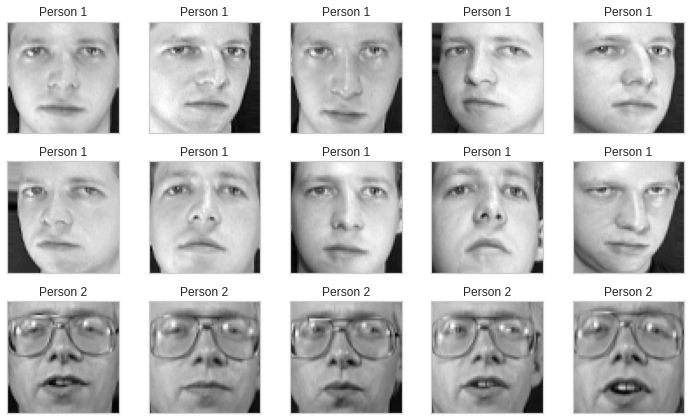

In [438]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

#plotting some image for visualisation
for i, ax in enumerate(axes.flat):
    if i < 5* 5:
        ax.imshow(X[i].reshape(64, 64), cmap='gray')
        ax.set_title(f'Person {y[i]+1}')
plt.tight_layout()
plt.show()

##Part A&B

In [439]:
# KMeans from scratch
import random
import numpy as np

class KMeans_scratch:
    def __init__(self,n_clusters=40,max_iterations=40000,initial_centroids=[]):
        self.n_clusters=n_clusters
        self.max_iterations=max_iterations
        self.clusters=[]
        self.centroids=[]
        if(len(initial_centroids)!=0):
            self.centroids=initial_centroids
    
    def fit(self,X):
        self.clusters=[[] for _ in range(self.n_clusters)]

        if (len(self.centroids)!=self.n_clusters):
            self.centroids = random.sample(list(X), self.n_clusters)
        # while(len(self.centroids)!=self.n_clusters):
        #     centroi= random.sample(list(X),1)
        #     if(centroi not in self.centroids):
        #         self.centroids.append(centroi)
        # print("centroids",len(self.centroids),len(self.centroids[0]))
        for i in range(self.max_iterations):
            self.clusters=self.assign_clusters(X)
            centroids_old=self.centroids
            # print("cluster",len(self.clusters),len(self.clusters[1]),len(self.clusters[0][0]))
            # print(len(centroids_old[0]))
            self.centroids=self.get_centroids()
            # print(len(self.centroids[0]))
            if(self.is_converged(centroids_old)):
                break
        return self.centroids,self.clusters
 
    def assign_clusters(self,X):
        clusters=[[] for _ in range(self.n_clusters)]
        for point in X:
            # print("1point",len(point))
            closest_centroid_ind=self.closest_centroid(point)
            clusters[closest_centroid_ind].append(point)
        
        for i, cluster in enumerate(clusters):
            if len(cluster) == 0:
                clusters[i] = [random.choice(X)]
        
        # print("len of clusters",len(clusters),len(clusters[0]),len(clusters[0][0]))
        return clusters
    
    def closest_centroid(self,point):
        distances=[]
        for centroid in self.centroids:
            # print("point",len(point))
            # print("centroid,",len(centroid))
            distances.append(np.mean(np.square(point-centroid))**0.5)
        return distances.index(min(distances))
    
    def get_centroids(self):
        centroids=[]
        for i, cluster in enumerate(self.clusters):
            if len(cluster) == 0:
                centroids.append(self.centroids[i])
            else:
                centroid=[]
                for j in range(len(cluster[0])):
                    centroid.append(np.mean([point[j] for point in cluster]))
                centroids.append(np.array(centroid))
        return centroids

    def is_converged(self,centroids_old):
        epsilon=1e-5
        eucli=(np.mean(np.square(np.array(self.centroids)-np.array(centroids_old))))**0.5
        if(eucli<epsilon):
            return True
        return False
        
    def SSE(self):
        sse=0
        for i in range(self.n_clusters):
            for point in self.clusters[i]:
                sse+=np.mean(np.square(point-self.centroids[i]))
        return sse


##Part C

In [440]:
randompoints_40 = np.random.rand(40, 4096)
model_rand=KMeans_scratch(n_clusters=40,max_iterations=40000,initial_centroids=randompoints_40)
centroids_rand,clusters_rand=model_rand.fit(X)

In [441]:
points_per_cluster = [len(cluster) for cluster in clusters_rand]
print((points_per_cluster))

[2, 30, 10, 16, 4, 15, 3, 12, 9, 8, 4, 8, 9, 1, 3, 16, 10, 24, 7, 31, 4, 9, 1, 6, 5, 21, 25, 2, 2, 11, 16, 12, 20, 3, 15, 4, 5, 6, 6, 5]


##Part D

In [442]:
def array_to_img(array,number_of_images, n_rows=64,n_cols=64):
    numpy_img=np.array(array)
    return numpy_img.reshape(number_of_images, n_rows, n_cols)

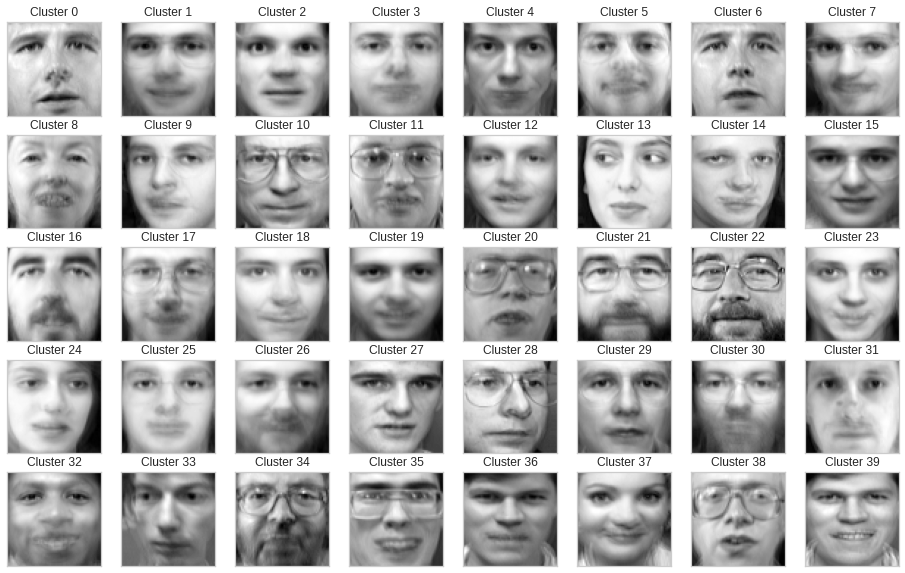

In [443]:
centroid_img=array_to_img(centroids_rand,len(centroids_rand))

fig, axs = plt.subplots(5, 8, figsize=(16, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(centroid_img[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Cluster {i}')

plt.show()

##Part E

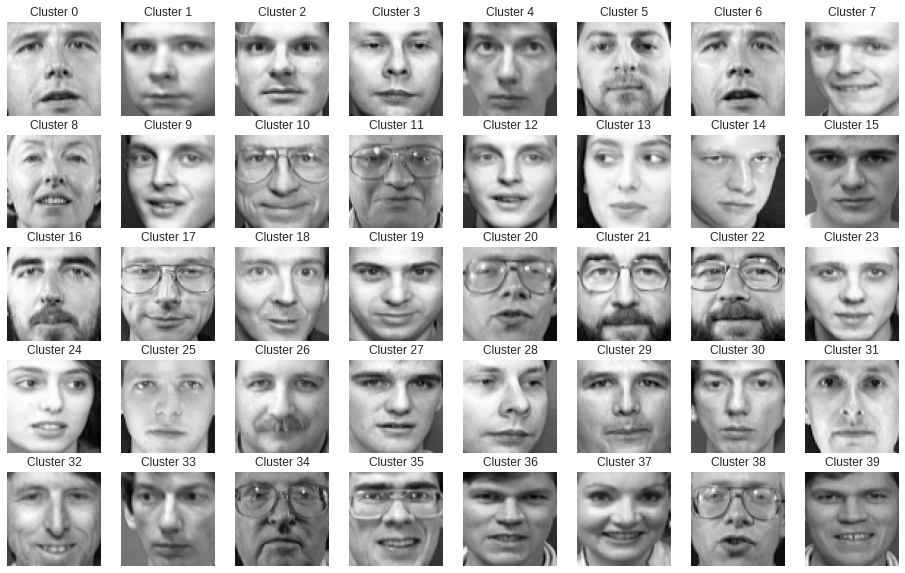

In [444]:
fig, axs = plt.subplots(5, 8, figsize=(16, 10))
for cluster_ind in range(len(clusters_rand)):
    best_point = clusters_rand[cluster_ind][0]
    for points_ind in range(len(clusters_rand[cluster_ind])):
        if np.linalg.norm(clusters_rand[cluster_ind][points_ind] - centroids_rand[cluster_ind]) < np.linalg.norm(best_point - centroids_rand[cluster_ind]):
            best_point = clusters_rand[cluster_ind][points_ind]
    axs[cluster_ind//8, cluster_ind%8].imshow(np.array(best_point).reshape(64, 64), cmap='gray')
    axs[cluster_ind//8, cluster_ind%8].axis('off')
    axs[cluster_ind//8, cluster_ind%8].set_title("Cluster {}".format(cluster_ind))
    
plt.show()


##Part F

In [445]:
points_40=[]
X=np.array(X)
for i in range(40):
    random_number = random.randint(0, 9)
    point=X[random_number+i*10,:]
    points_40.append(point)

model_init=KMeans_scratch(n_clusters=40,max_iterations=40000,initial_centroids=points_40)
centroids_init,clusters_init=model_init.fit(X)

In [446]:
points_per_cluster = [len(cluster) for cluster in clusters_init]
print(points_per_cluster)

[9, 10, 7, 7, 9, 7, 9, 7, 18, 9, 15, 5, 12, 10, 13, 2, 4, 16, 5, 4, 18, 10, 18, 13, 13, 9, 10, 9, 8, 17, 6, 9, 10, 10, 7, 5, 10, 10, 15, 15]


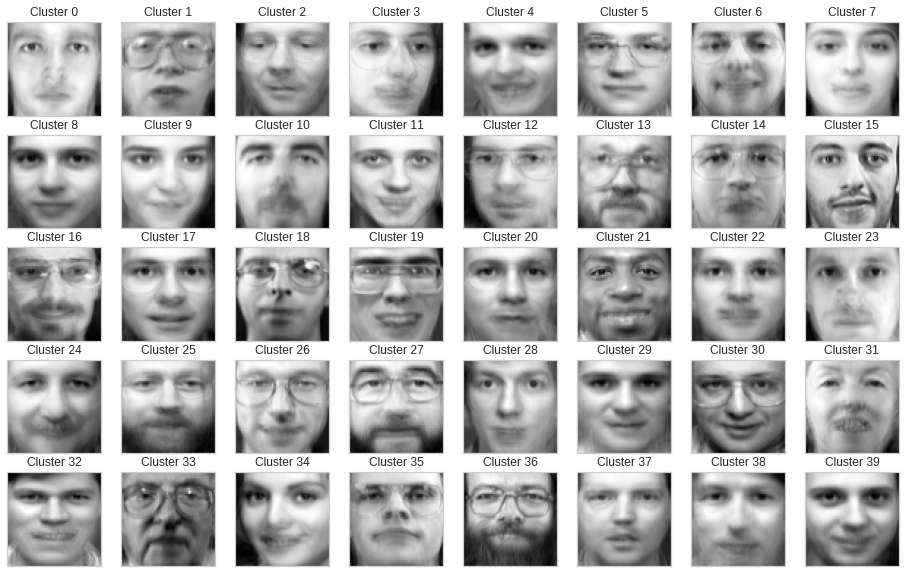

In [447]:
centroid_img=array_to_img(centroids_init,len(centroids_init))

fig, axs = plt.subplots(5, 8, figsize=(16, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(centroid_img[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Cluster {i}')

plt.show()

##Part G

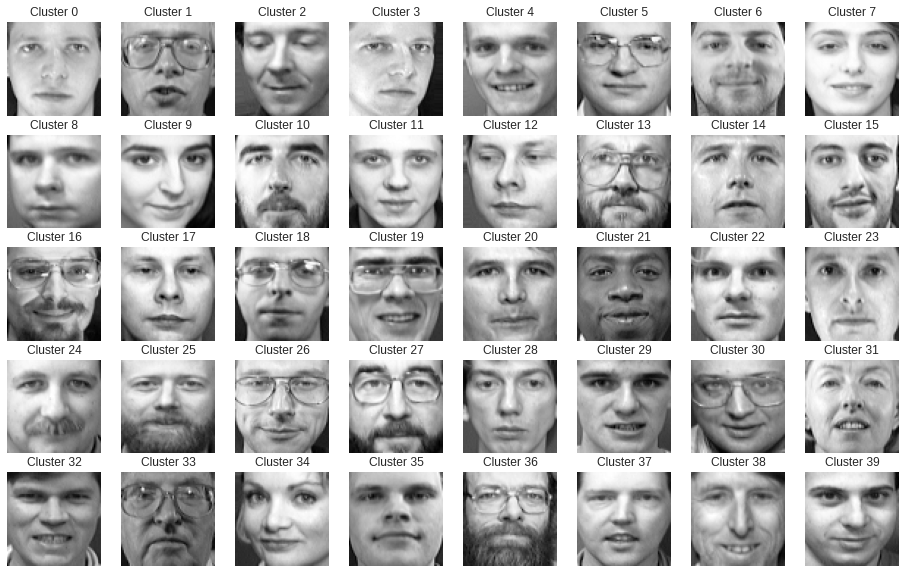

In [448]:
fig, axs = plt.subplots(5, 8, figsize=(16, 10))
for cluster_ind in range(len(clusters_init)):
    best_point = clusters_init[cluster_ind][0]
    for points_ind in range(len(clusters_init[cluster_ind])):
        if np.linalg.norm(clusters_init[cluster_ind][points_ind] - centroids_init[cluster_ind]) < np.linalg.norm(best_point - centroids_init[cluster_ind]):
            best_point = clusters_init[cluster_ind][points_ind]
    axs[cluster_ind//8, cluster_ind%8].imshow(best_point.reshape(64, 64), cmap='gray')
    axs[cluster_ind//8, cluster_ind%8].axis('off')
    axs[cluster_ind//8, cluster_ind%8].set_title("Cluster {}".format(cluster_ind))
    
plt.show()


##Part H

In [449]:
print(f'Sum of Squared Error (SSE) for random_initialised points model: {model_rand.SSE()}')
print(f'Sum of Squared Error (SSE) for per_cluster_initialised points model: {model_init.SSE()}')

Sum of Squared Error (SSE) for random_initialised points model: 3.376657066401094
Sum of Squared Error (SSE) for per_cluster_initialised points model: 3.00938022963237


#Question 3

##Part A

In [450]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [451]:
if(not(os.path.exists("Wholesalecustomersdata.csv"))):
    os.system("wget https://www.dropbox.com/s/n3cpe2ypk673ih2/Wholesalecustomersdata.csv")

In [452]:
df=pd.read_csv("Wholesalecustomersdata.csv")
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

In [453]:
print(np.unique(df['Channel']))
print(np.unique(df['Region']))

[1 2]
[1 2 3]


In [454]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [455]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [456]:
scale=MinMaxScaler()
for col in df.columns:
    df[col]=scale.fit_transform(df[[col]])

In [457]:
df.head()

Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0      1.0     1.0  0.112940  0.130727  0.081464  0.003106          0.065427   
1      1.0     1.0  0.062899  0.132824  0.103097  0.028548          0.080590   
2      1.0     1.0  0.056622  0.119181  0.082790  0.039116          0.086052   
3      0.0     1.0  0.118254  0.015536  0.045464  0.104842          0.012346   
4      1.0     1.0  0.201626  0.072914  0.077552  0.063934          0.043455   

   Delicassen  
0    0.027847  
1    0.036984  
2    0.163559  
3    0.037234  
4    0.108093

In [458]:
df.describe()

Channel      Region       Fresh        Milk     Grocery      Frozen  \
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000   
mean     0.322727    0.771591    0.106977    0.078173    0.085671    0.050078   
std      0.468052    0.387136    0.112774    0.100491    0.102430    0.079789   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.500000    0.027863    0.020124    0.023174    0.011788   
50%      0.000000    1.000000    0.075802    0.048636    0.051225    0.024670   
75%      1.000000    1.000000    0.150968    0.097154    0.114821    0.058005   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Detergents_Paper  Delicassen  
count        440.000000  440.000000  
mean           0.070510    0.031745  
std            0.116790    0.058826  
min            0.000000    0.000000  
25%            0.006216    0.008453  
50%            0.019927    0.020077  
75%            0.095997    0.037907  
max            1.000000    1.000000

##Part B

In [459]:
cov_matrix=df.cov()
cov_matrix

Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           0.219072  0.011239 -0.008930  0.021670  0.029187 -0.007545   
Region            0.011239  0.149874  0.002414  0.001256  0.000305 -0.000650   
Fresh            -0.008930  0.002414  0.012718  0.001139 -0.000137  0.003112   
Milk              0.021670  0.001256  0.001139  0.010098  0.007497  0.000994   
Grocery           0.029187  0.000305 -0.000137  0.007497  0.010492 -0.000328   
Frozen           -0.007545 -0.000650  0.003112  0.000994 -0.000328  0.006366   
Detergents_Paper  0.034768 -0.000067 -0.001343  0.007767  0.011061 -0.001226   
Delicassen        0.001542  0.001030  0.001623  0.002402  0.001238  0.001835   

                  Detergents_Paper  Delicassen  
Channel                   0.034768    0.001542  
Region                   -0.000067    0.001030  
Fresh                    -0.001343    0.001623  
Milk                      0.007767    0.002402  
Grocery                   0.011061    0.001238  
Frozen                   -0.001226    0.001835  
Detergents_Paper          0.013640    0.000476  
Delicassen                0.000476    0.003460

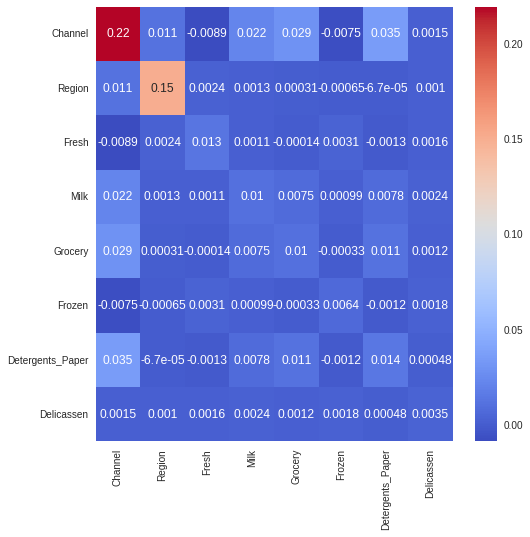

In [460]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.show()

In [461]:
# Finding best covariance related features
max_cov = 0
for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        if i < j:
            cov_ij = np.cov(df.iloc[:, i], df.iloc[:, j])[0][1]
            if max_cov < cov_ij:
                max_cov = cov_ij

cnt=1
for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        if i < j:
            if(max_cov== np.cov(df.iloc[:, i], df.iloc[:, j])[0][1]):   
                if(cnt):
                    cnt=-1
                    print(np.cov(df.iloc[:, i], df.iloc[:, j]))
                print("Features with max_cov :",[str(df.columns[i]),str(df.columns[j])])


[[0.21907227 0.03476772]
 [0.03476772 0.01364002]]
Features with max_cov : ['Channel', 'Detergents_Paper']


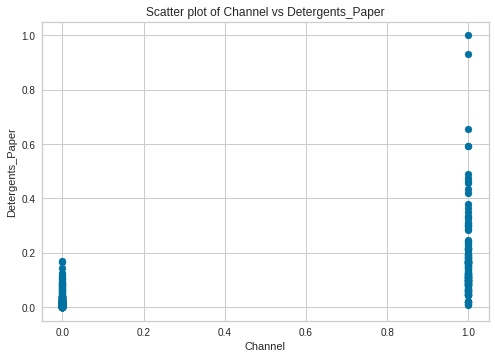

In [462]:
#Visualisation of best_cov feature
plt.scatter(df['Channel'], df['Detergents_Paper'],cmap='BrBG')
plt.xlabel('Channel')
plt.ylabel('Detergents_Paper')
plt.title('Scatter plot of Channel vs Detergents_Paper')
plt.show()

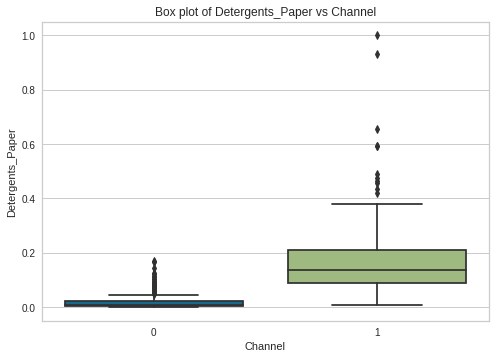

In [463]:
grouped_data = df.groupby('Channel')['Detergents_Paper'].apply(list)
sns.boxplot(data=grouped_data)
plt.xlabel('Channel')
plt.ylabel('Detergents_Paper')
plt.title('Box plot of Detergents_Paper vs Channel')
plt.show()

##Part C

In [464]:
#DBScan
db = DBSCAN()
clusters = db.fit_predict(df)

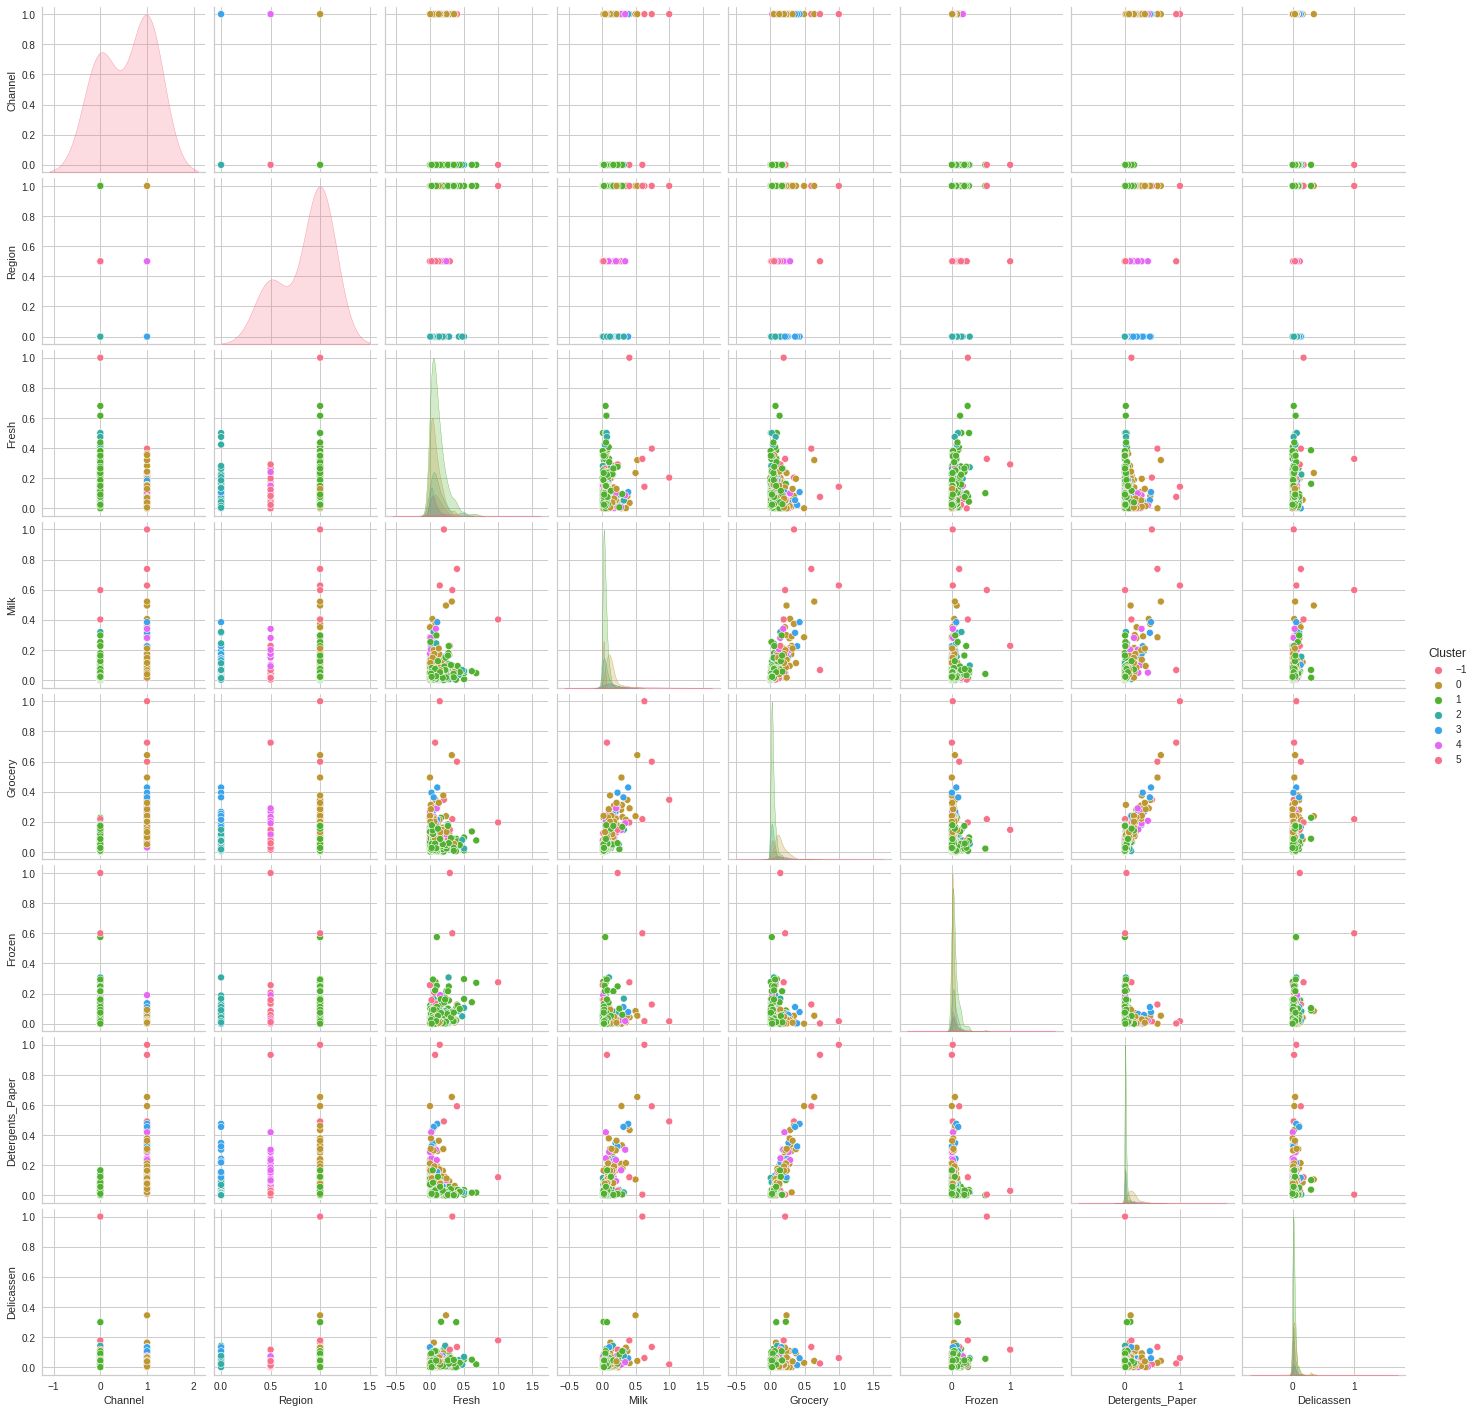

In [465]:
# Visualizing
df_temp = df.copy()
df_temp['Cluster'] = clusters

# Pairplot visualization
sns.pairplot(df_temp, hue='Cluster',palette='husl')

##Part D

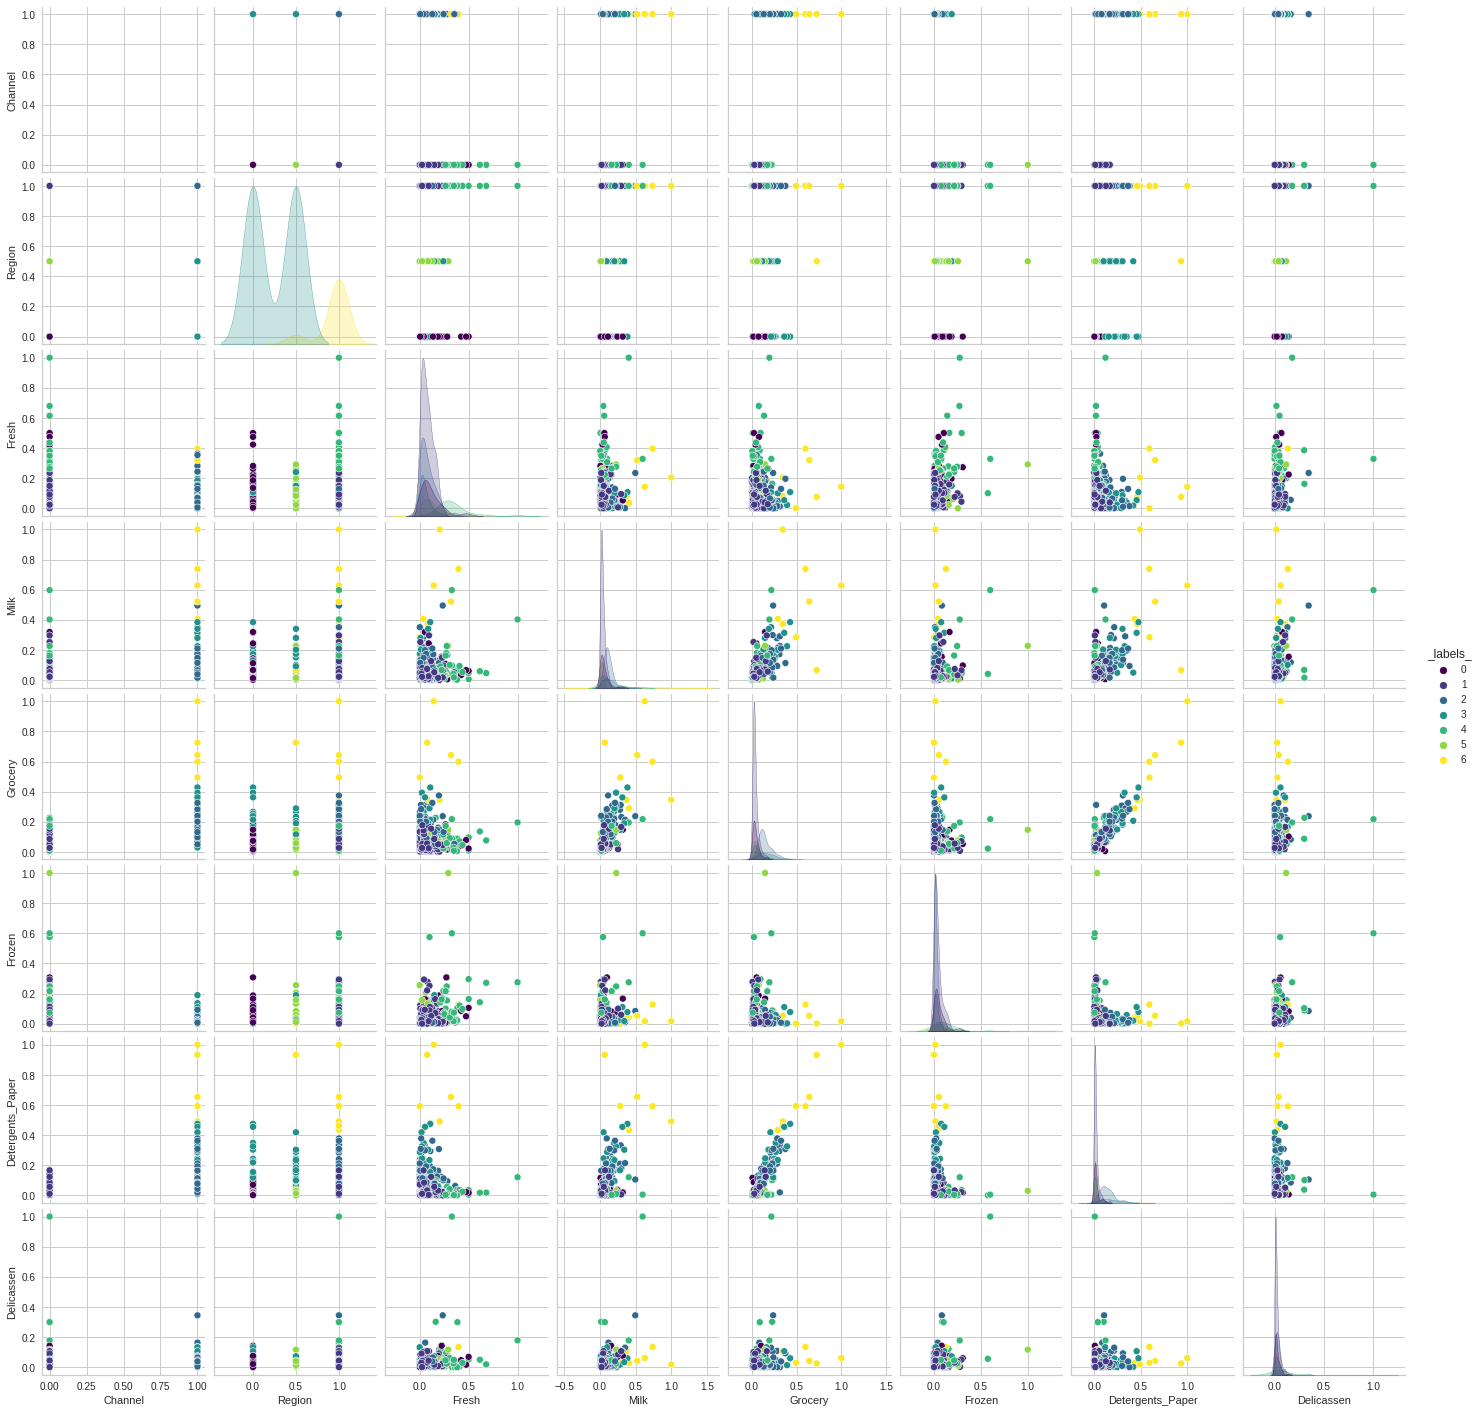

In [466]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df)

df_temp=df.copy()
df_temp['_labels_']=kmeans.labels_
# Visualizing
sns.pairplot(df_temp, hue='_labels_', palette='viridis')
plt.show()


In [467]:
dbscan = DBSCAN()
labels_dbscan = dbscan.fit_predict(df)

kmeans = KMeans(n_clusters=2)
labels_kmeans = kmeans.fit_predict(df)

# Performance
from sklearn.metrics import silhouette_score
silhouette_dbscan = silhouette_score(df, labels_dbscan)
silhouette_kmeans = silhouette_score(df, labels_kmeans)

print(f"DBSCAN Silhouette score: {silhouette_dbscan}")
print(f"KMeans Silhouette score: {silhouette_kmeans}")

DBSCAN Silhouette score: 0.6360287841835186
KMeans Silhouette score: 0.5928657922516165


##Part E

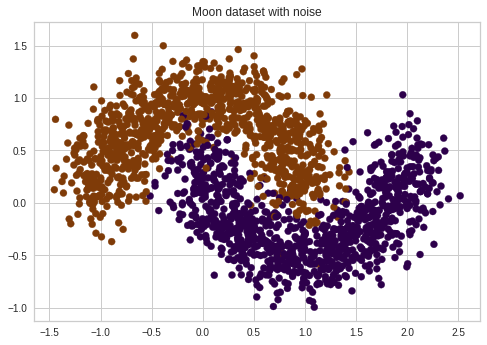

In [468]:
X, y = make_moons(n_samples=2000, noise=0.2, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='PuOr')
plt.title('Moon dataset with noise')
plt.show()

In [469]:
#DBScan
db = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = db.fit_predict(X)

#kmeans
kmeans = KMeans(n_clusters=2).fit(X)
kmeans_labels = kmeans.predict(X)

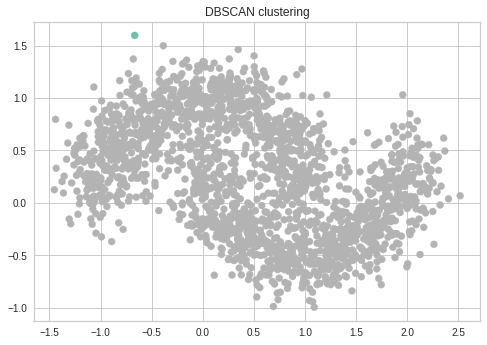

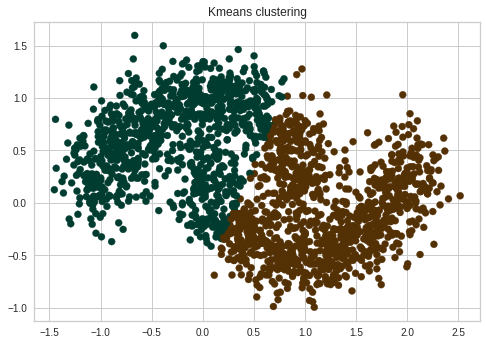

In [470]:
# Visualize the clustering results using DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='Set2')
plt.title('DBSCAN clustering')
plt.show()

# Visualize the clustering results using KNN
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='BrBG')
plt.title('Kmeans clustering')
plt.show()

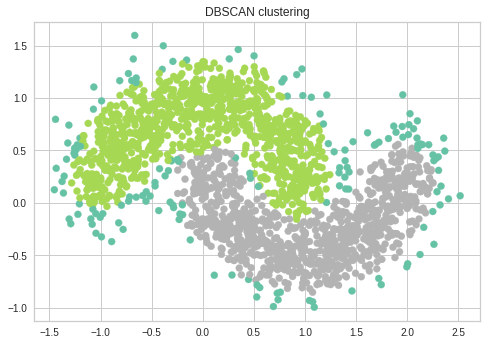

In [471]:
#DBScan with 
db = DBSCAN(eps=0.2, min_samples=50)
dbscan_labels = db.fit_predict(X)

# Visualize the clustering results using DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='Set2')
plt.title('DBSCAN clustering')
plt.show()